In [85]:
import pandas as pd

In [124]:
#importing the dataset
df=pd.read_csv('/content/sample_data/Churn_Modelling.csv')

In [87]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [88]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [89]:
import seaborn as sns
import numpy as np

# **Univariate Analaysis**

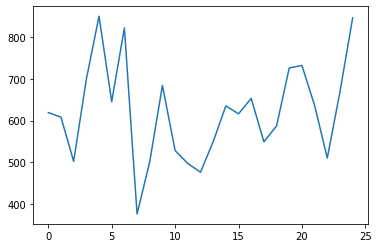

In [90]:
df.head(25).CreditScore.plot()

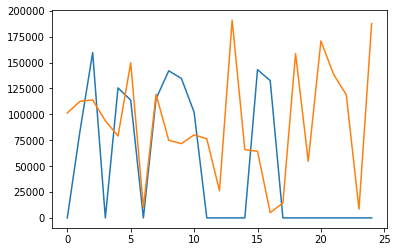

In [91]:
df.head(25).Balance.plot()
df.head(25).EstimatedSalary.plot()

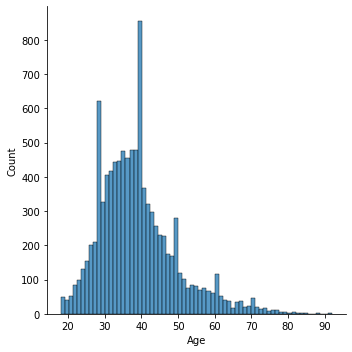

In [92]:
sns.displot(df.Age)

# **Bi-Variate Analysis**

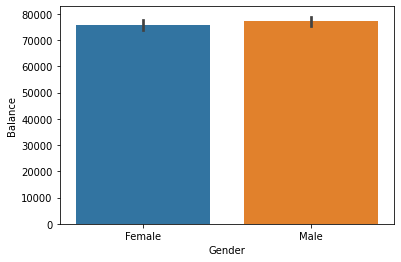

In [93]:
sns.barplot(x='Gender',y='Balance',data=df)


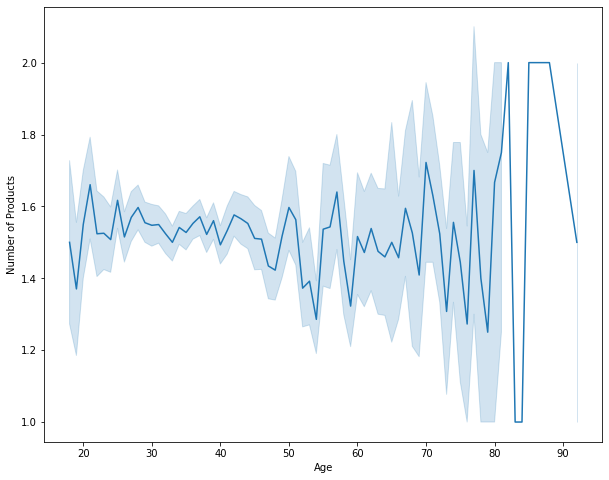

In [94]:
plt.figure(figsize=(10, 8))
sns.lineplot(x=df["Age"], y=df["NumOfProducts"]);
plt.xlabel('Age');
plt.ylabel('Number of Products');

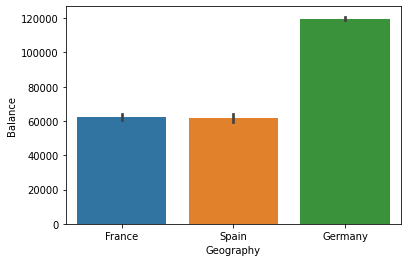

In [95]:
sns.barplot(x='Geography',y='Balance',data=df)

# **Multi-Variate Analysis**

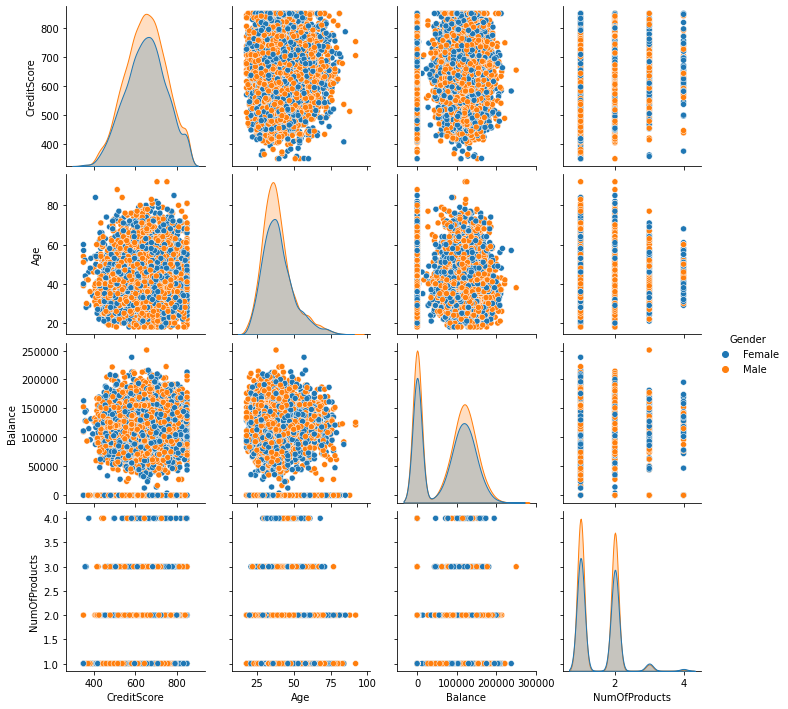

In [96]:
sns.pairplot(data=df[["CreditScore","Age","Gender","Balance","NumOfProducts"]],hue="Gender",diag_kind='kde')

# **Descriptive Statistics**

In [97]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [98]:
print ("Mean: ",df['Age'].mean())
print ("Mode: ",df['Balance'].mode())
print ("Median: ",df['Tenure'].median())

Mean:  38.9218
Mode:  0    0.0
dtype: float64
Median:  5.0


# **Handling the missing Null Values**

In [99]:
df.shape

(10000, 14)

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [101]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['CreditScore'].fillna(df['CreditScore'].median(),inplace=True)
df['Geography'].fillna(df['Geography'].mode(),inplace=True)

In [102]:
df.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

# **Find the Outliers and remove the outliers**

### **Remove Outlier Using IQR**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


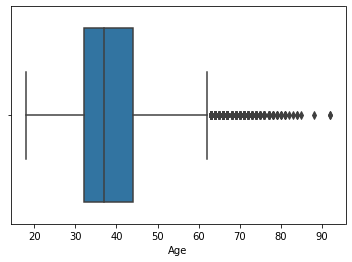

In [103]:
sns.boxplot(df.Age)

In [104]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)

In [105]:
IQR=q3-q1

In [106]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [107]:
df=df[df.Age<upper_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


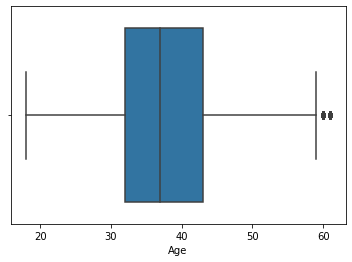

In [108]:
sns.boxplot(df.Age)

In [109]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)


In [110]:
IQR=q3-q1

In [111]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [112]:
df=df[df.Age<upper_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


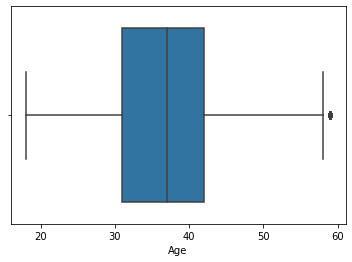

In [113]:
sns.boxplot(df.Age)

In [114]:
q1=df.Age.quantile(0.25)
q3=df.Age.quantile(0.75)


In [115]:
IQR=q3-q1

In [116]:
upper_limit=q3+1.5*IQR
lower_limit=q1-1.5*IQR

In [117]:
df=df[df.Age<upper_limit]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


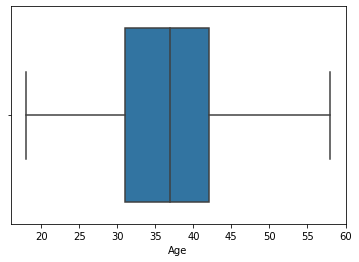

In [118]:
sns.boxplot(df.Age)

### **Remove Outlier Using Percentile**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


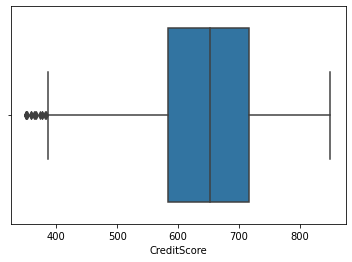

In [119]:
sns.boxplot(df.CreditScore)

In [140]:
p99=df.CreditScore.quantile(0.002)
p99

403.994

In [121]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,9412.000000,9.412000e+03,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000,9412.000000
mean,4996.306417,1.569080e+07,650.428389,37.241288,5.017212,76489.760152,1.532724,0.705270,0.499150,100231.092488,0.197620
std,2889.136983,7.192712e+04,96.535308,8.160495,2.889551,62428.353845,0.580646,0.455946,0.500026,57475.669680,0.398225
min,1.000000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2481.750000,1.562820e+07,583.750000,31.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51355.342500,0.000000
50%,5010.500000,1.569098e+07,652.000000,37.000000,5.000000,97261.755000,1.000000,1.000000,0.000000,100438.025000,0.000000
75%,7486.250000,1.575292e+07,717.000000,42.000000,7.250000,127656.530000,2.000000,1.000000,1.000000,149400.107500,0.000000
max,10000.000000,1.581569e+07,850.000000,58.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000


In [141]:
df2=df[df.CreditScore>=p99]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


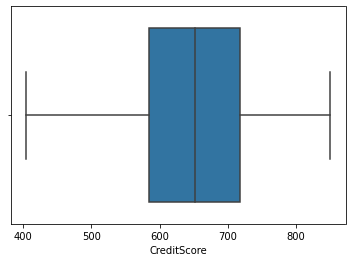

In [142]:
sns.boxplot(df2.CreditScore)

# **Perform Encoding on Categorical column**
###**Label Encoding**

In [143]:
from sklearn.preprocessing import LabelEncoder

In [145]:
le=LabelEncoder()

In [146]:
df.Gender=le.fit_transform(df.Gender)
df.Geography=le.fit_transform(df.Geography)

In [147]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


### **One Hot Encoding**

In [148]:
df_main=pd.get_dummies(df,columns=['Geography'])
df_main.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,79084.10,0,0,0,1


# **Split the data into dependent and independent variable**

In [150]:
#Independent variable
X=df_main.drop(columns=['EstimatedSalary'],axis=1)
X.head()

,RowNumber,CustomerId,Surname,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited,Geography_0,Geography_1,Geography_2
0,1,15634602,Hargrave,619,0,42,2,0.00,1,1,1,1,1,0,0
1,2,15647311,Hill,608,0,41,1,83807.86,1,0,1,0,0,0,1
2,3,15619304,Onio,502,0,42,8,159660.80,3,1,0,1,1,0,0
3,4,15701354,Boni,699,0,39,1,0.00,2,0,0,0,1,0,0
4,5,15737888,Mitchell,850,0,43,2,125510.82,1,1,1,0,0,0,1


In [152]:
Y=df_main['EstimatedSalary']
Y.head()

0    101348.88
1    112542.58
2    113931.57
3     93826.63
4     79084.10
Name: EstimatedSalary, dtype: float64

# **Scaling the Independent Variable**

In [153]:
from sklearn.preprocessing import scale

In [156]:
X=df_main.drop(columns=['Surname'],axis=1)
x_scaled=pd.DataFrame(scale(X),columns=X.columns)
x_scaled.head()

,RowNumber,CustomerId,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_0,Geography_1,Geography_2
0,-1.731878,-0.783213,-0.326221,-1.095988,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886,1.977165,0.997204,-0.578736,-0.573809
1,-1.731531,-0.606534,-0.440036,-1.095988,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534,-0.505775,-1.002804,-0.578736,1.742740
2,-1.731185,-0.995885,-1.536794,-1.095988,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687,1.977165,0.997204,-0.578736,-0.573809
3,-1.730838,0.144767,0.501521,-1.095988,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918,-0.505775,0.997204,-0.578736,-0.573809
4,-1.730492,0.652659,2.063884,-1.095988,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276,-0.505775,-1.002804,-0.578736,1.742740


# **Split Data into trainig and testing**

In [158]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x_scaled,Y,test_size=0.3,random_state=0)

In [159]:
X_train.shape

(7000, 15)

In [160]:
y_train.shape

(7000,)

In [161]:
X_test.shape

(3000, 15)

In [162]:
y_test.shape

(3000,)